### Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

### K-Means Clustering

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=[2, 1, 1, 2], random_state=101)

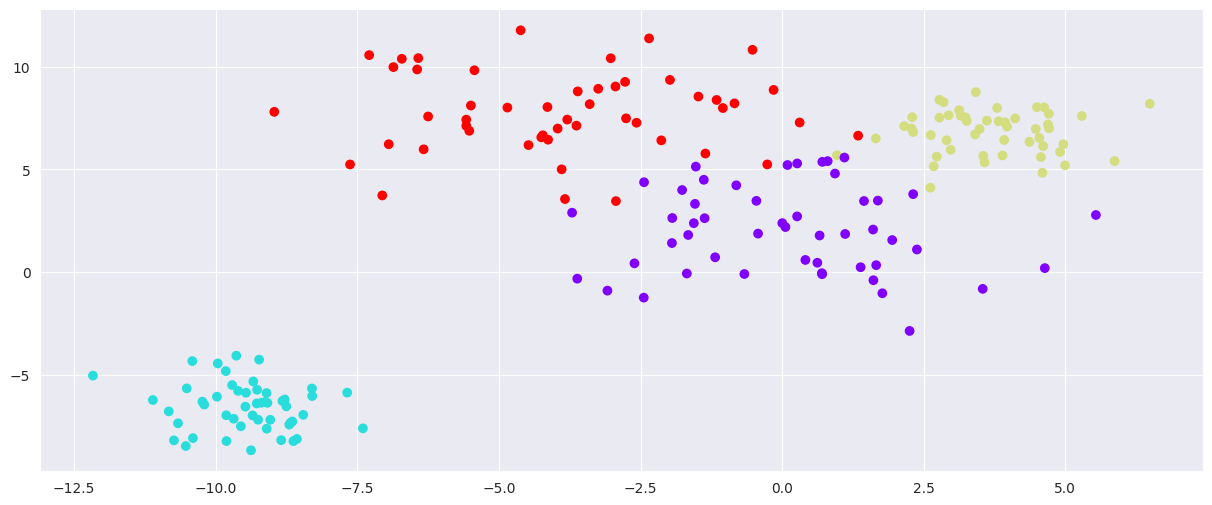

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(data[0])

KMeans(n_clusters=4, n_init='auto')

In [8]:
kmeans.cluster_centers_

array([[-4.26532727,  8.04228496],
       [-9.45212819, -6.56470497],
       [-0.31922142,  1.65750485],
       [ 3.22962915,  6.57426507]])

In [9]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       3, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 3, 2, 0, 3, 2, 1, 0, 3, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       3, 1, 1, 1, 1, 2, 3, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 3, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 2, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 3, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 3, 3, 3,
       1, 2], dtype=int32)

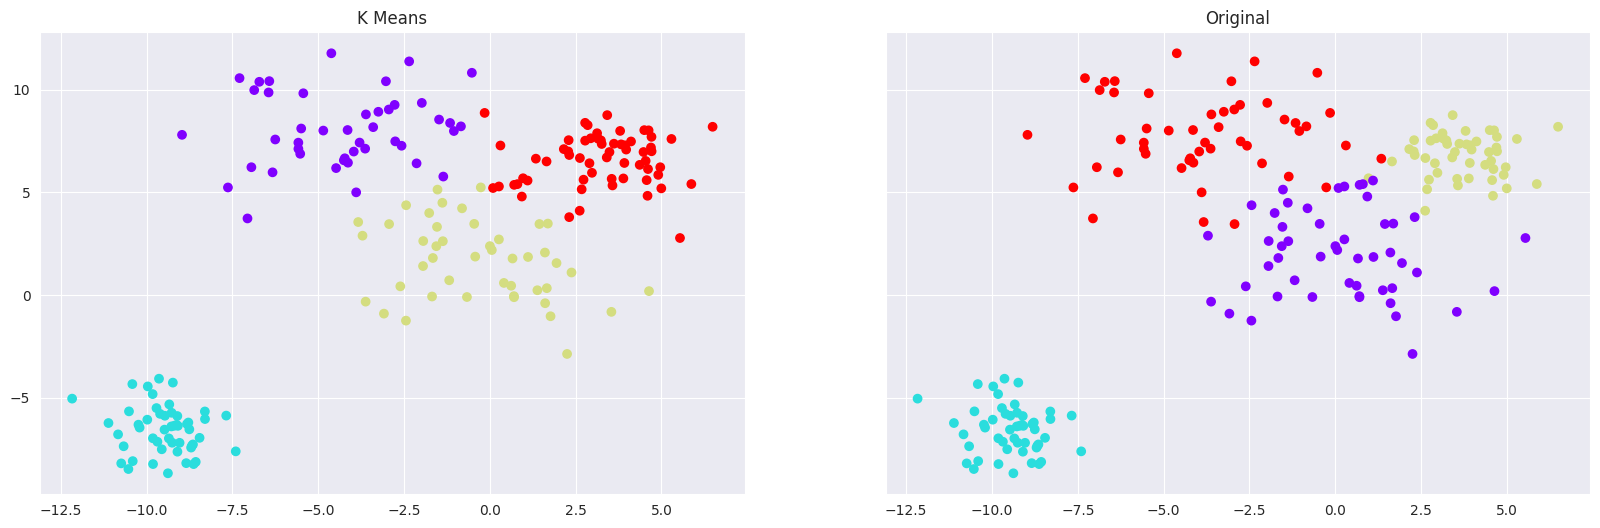

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

### Problemas do K-Means

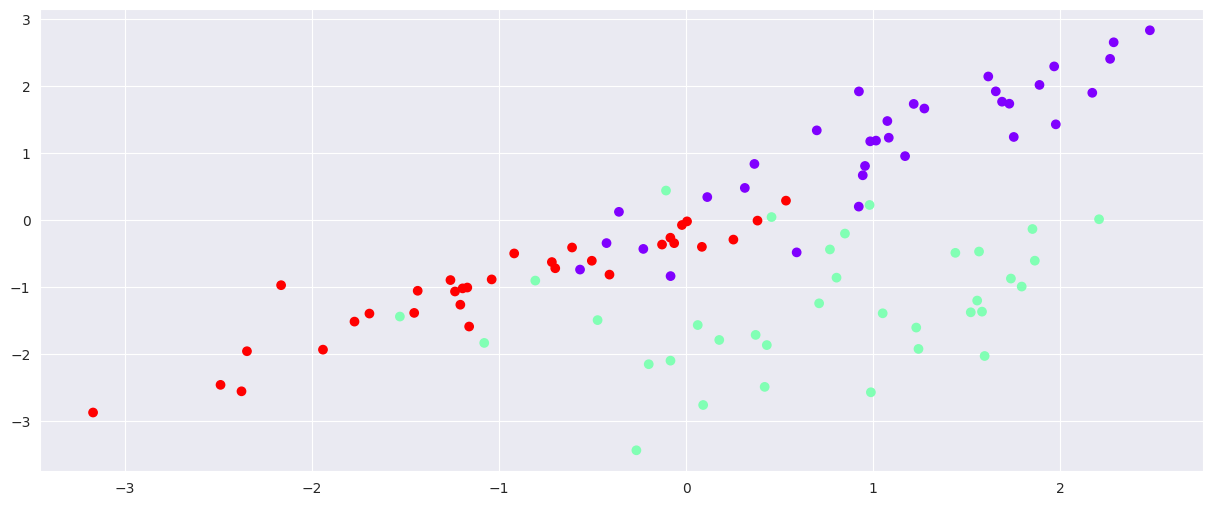

In [11]:
from sklearn.datasets import make_classification, make_gaussian_quantiles

data = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,
                           n_classes=3, random_state=21)

fig, ax = plt.subplots(figsize=(15, 6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

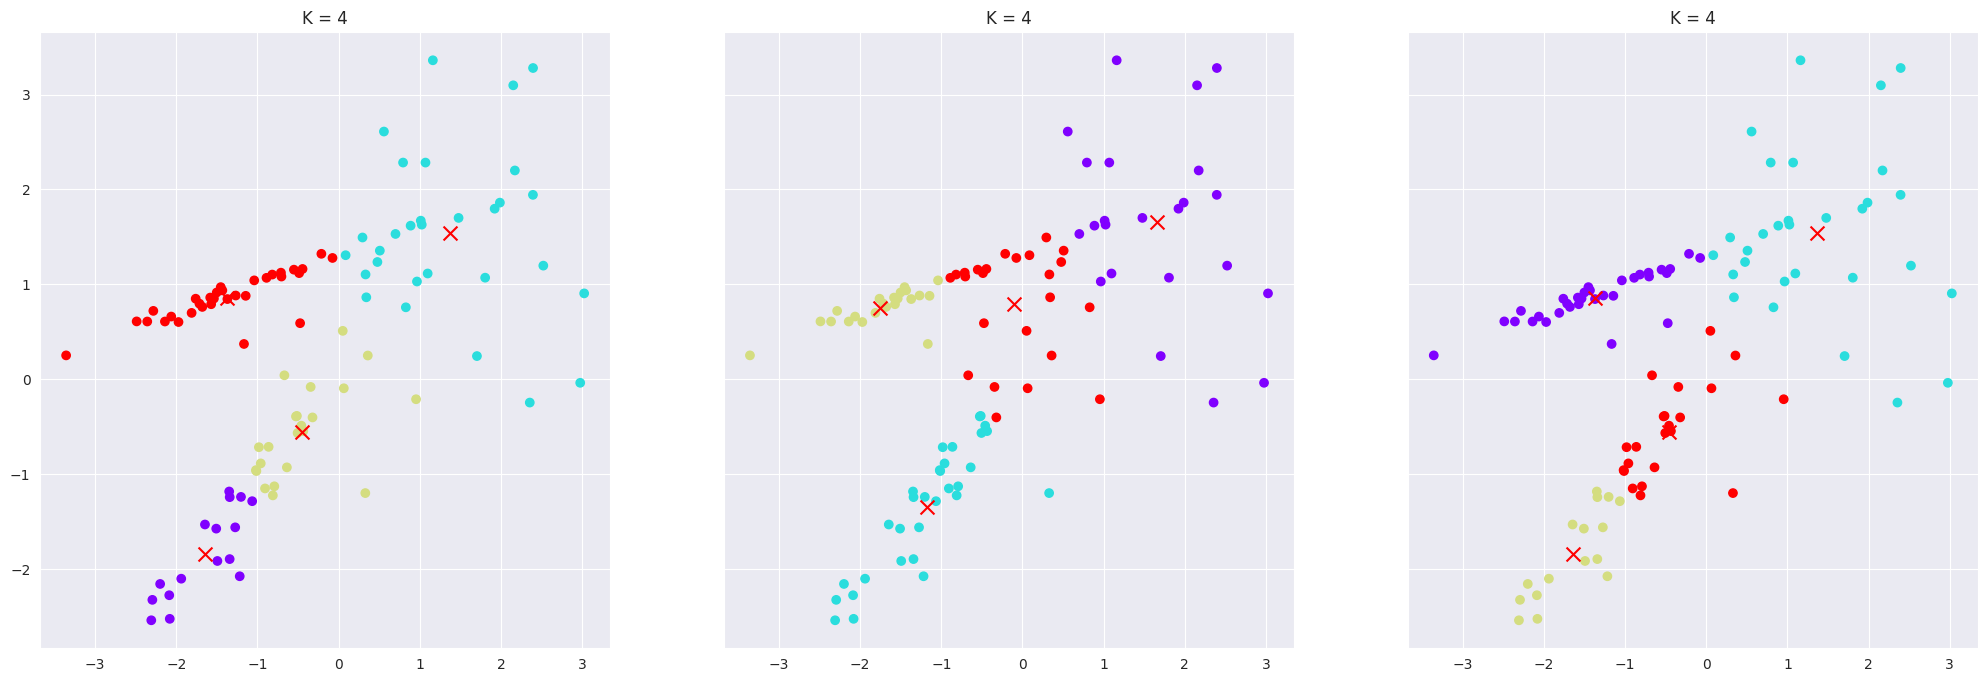

In [12]:
n = 3
f, ax = plt.subplots(1, n, sharey=True,figsize=(25, 8))

data = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,
                           n_classes=3, random_state=24)

i = 0
for _ in range(n):
    ax[i].set_title('K = 4'.format(4))
    kmeans = KMeans(n_clusters=4, n_init='auto')
    kmeans.fit(data[0])

    ax[i].scatter(data[0][:,0],data[0][:,1], c=kmeans.labels_, cmap="rainbow")
    ax[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", color="red", s=100)
    i += 1

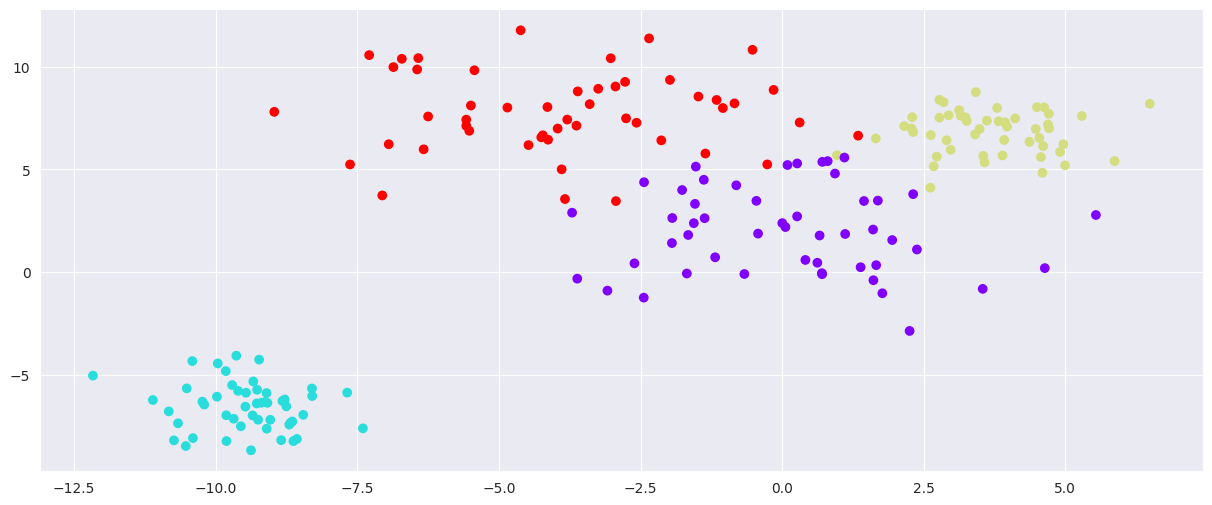

In [13]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=[2, 1, 1, 2],random_state=101)
fig, ax = plt.subplots(figsize=(15, 6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(data[0])

KMeans(n_clusters=4, n_init='auto')

In [15]:
kmeans.inertia_

993.7671913130328

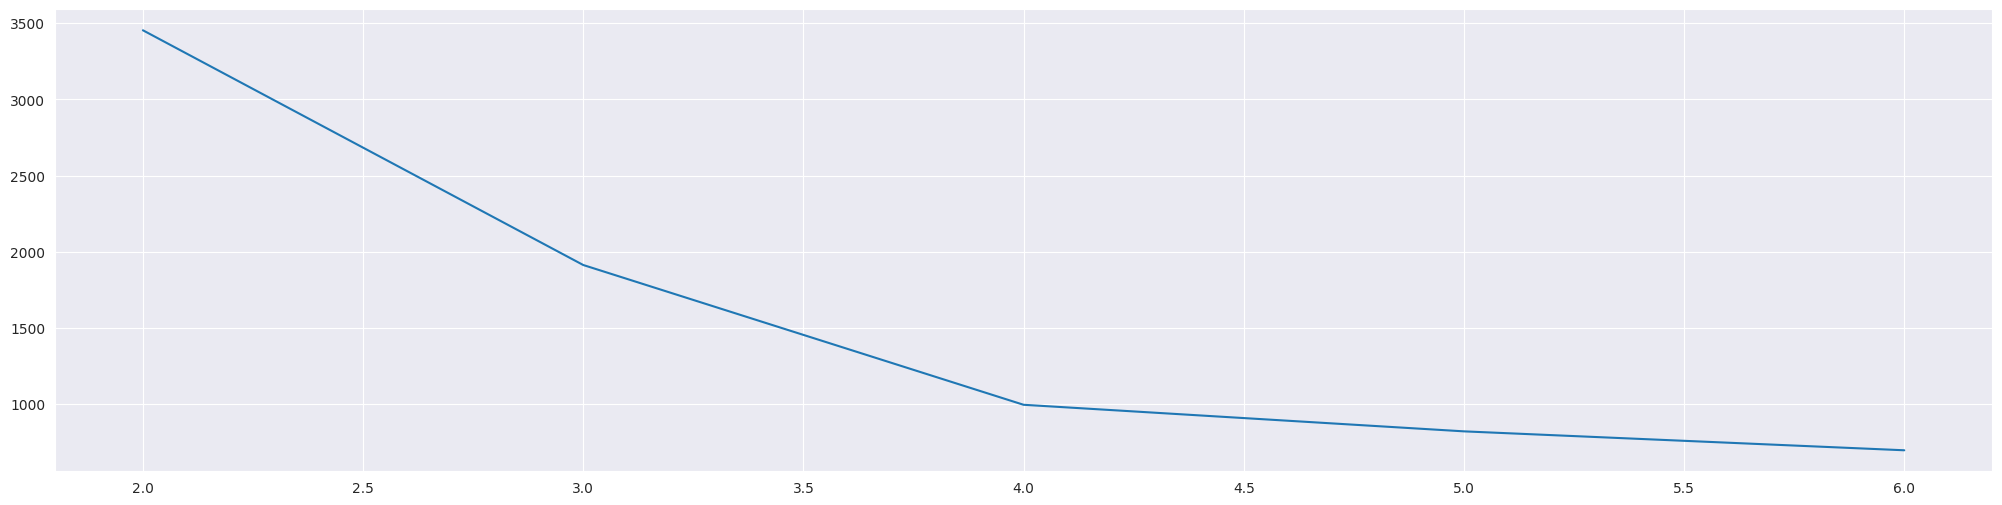

In [16]:
f, ax = plt.subplots(figsize=(25, 6))

list_inertia = []
list_k = []
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data[0])

    list_inertia += [kmeans.inertia_]
    list_k += [k]
ax.plot(list_k, list_inertia)

### Gaussian Mixture Models

In [17]:
from sklearn.datasets import make_gaussian_quantiles

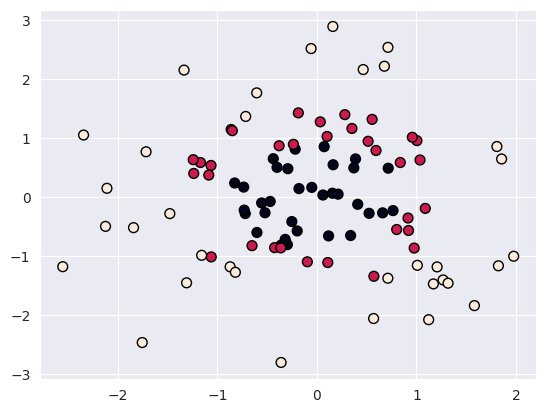

In [18]:
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=50, edgecolor="k")

In [19]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3)
gm.fit(X1)

GaussianMixture(n_components=3)

In [20]:
gm.weights_

array([0.19663826, 0.41857813, 0.38478361])

In [21]:
gm.means_

array([[ 0.88188161, -1.01971456],
       [ 0.18041544,  0.76532878],
       [-0.80614514, -0.28764408]])

In [22]:
gm.covariances_

array([[[ 0.35767733, -0.15624964],
        [-0.15624964,  0.3553582 ]],

       [[ 0.4977359 ,  0.02547733],
        [ 0.02547733,  0.81423725]],

       [[ 0.6256192 , -0.00538226],
        [-0.00538226,  0.97049342]]])

In [23]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, **kwargs):
    ax = plt.gca()

    # Convert covariance to principal axes
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [24]:
def plot_gmm(gmm, X):
    fig, ax = plt.subplots(figsize=(20, 8))

    labels=gmm.predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    w_factor = 0.2/gmm.weights_.max()
    for pos, covar, w, c in zip(gmm.means_, gmm.covariances_, gmm.weights_, ["red", "blue", "green"]):
        draw_ellipse(pos, covar, alpha=w * w_factor, color=c)

<ipython-input-23-0ff5eabf9160>:13: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


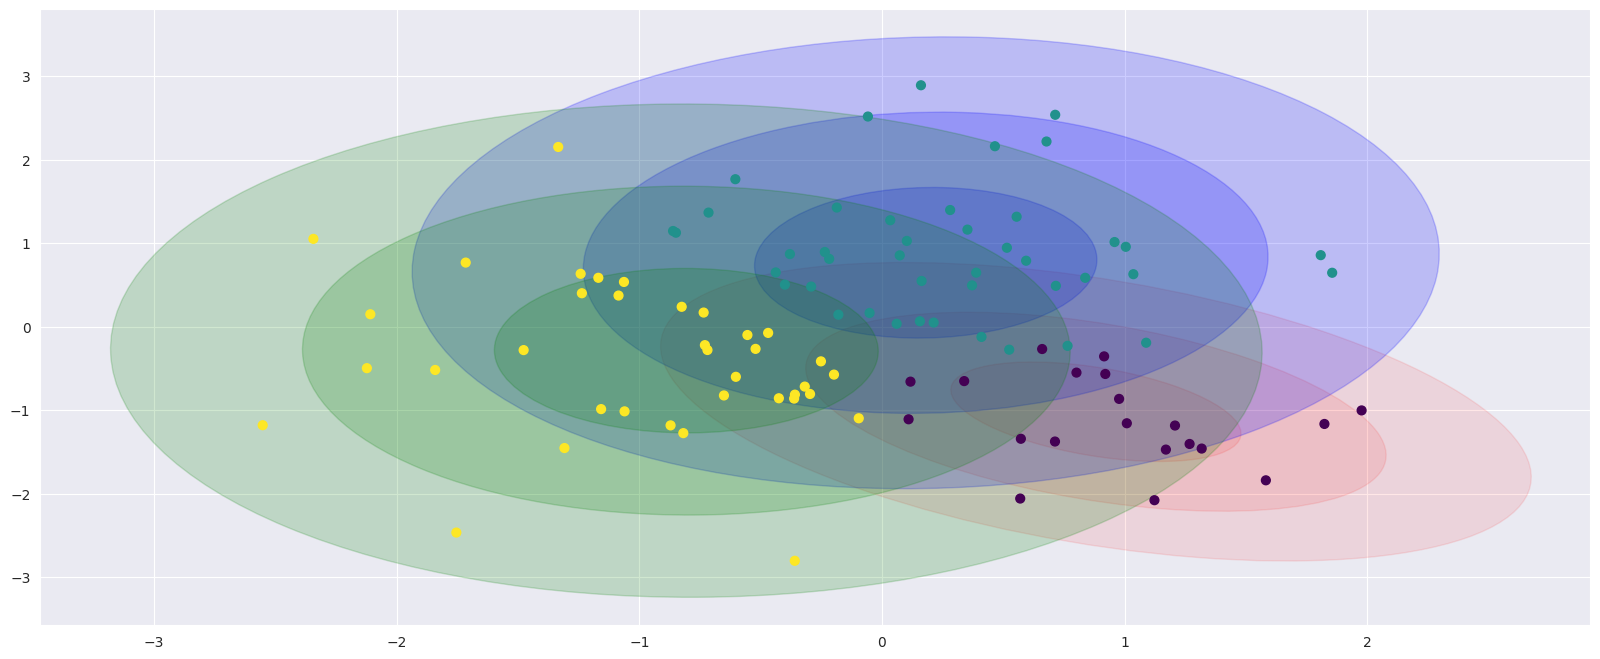

In [25]:
plot_gmm(gm, X1)

### Detecção de anomalias e geração de novas estimativas

In [26]:
gm.sample(10)

(array([[ 0.8089936 , -1.42483302],
        [ 0.80645555, -0.5979854 ],
        [ 0.36228028,  1.61962799],
        [ 1.79456781,  0.49959651],
        [-1.2009922 ,  0.80319916],
        [-0.29870722,  0.16330315],
        [ 0.3186248 ,  2.46036541],
        [-2.06607523, -1.67046084],
        [ 0.45296652,  0.05800614],
        [-1.34070581, -1.43788246]]),
 array([0, 0, 1, 1, 1, 1, 1, 2, 2, 2]))

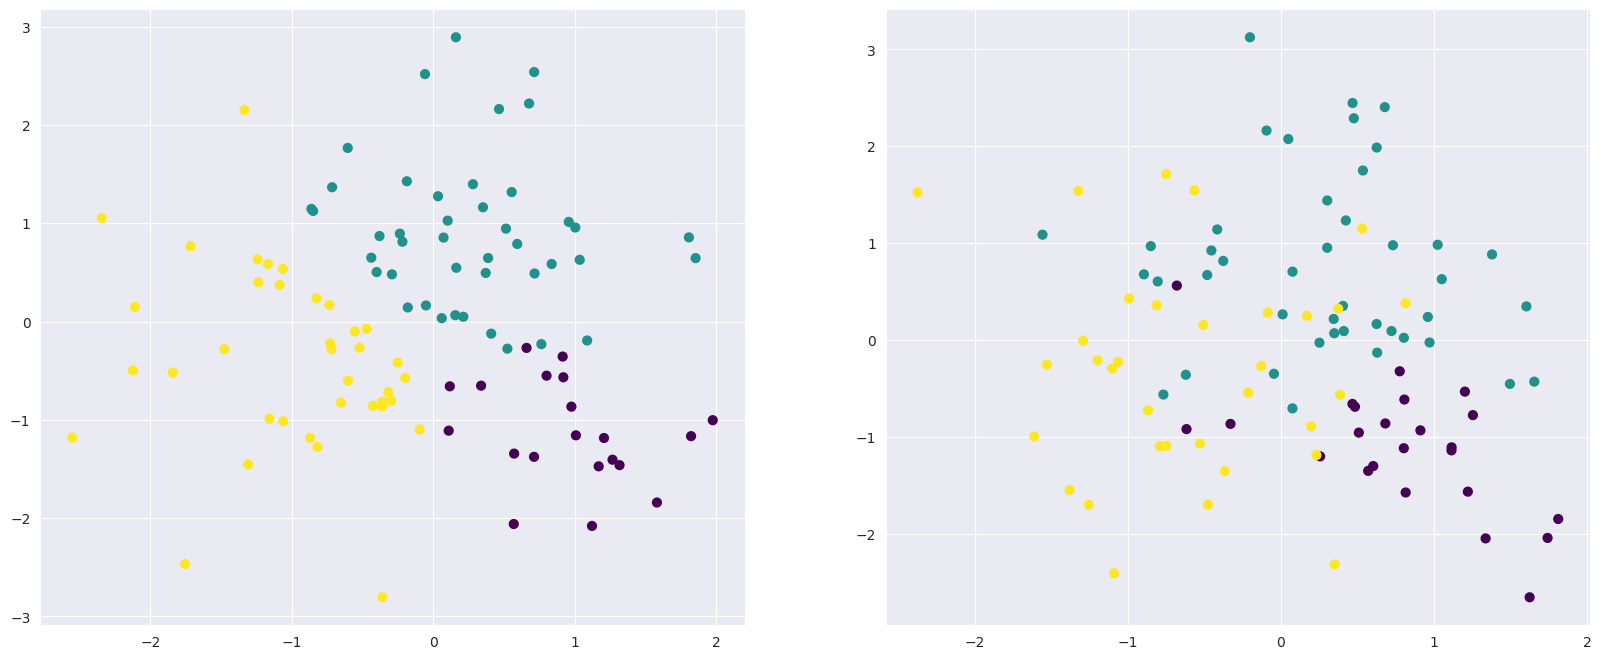

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

labels=gm.predict(X1)
ax[0].scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis')

X_new, Y_new = gm.sample(100)
ax[1].scatter(X_new[:, 0], X_new[:, 1], c=Y_new, s=40, cmap='viridis')

In [28]:
X1.shape

(100, 2)

In [29]:
gm.score_samples(X1)

array([-2.80499702, -2.84215571, -2.20411626, -2.20704077, -2.28086893,
       -2.13128114, -2.44467614, -2.25032127, -2.41635735, -2.13815675,
       -2.10704966, -2.34764565, -2.1640044 , -2.46235842, -2.13717013,
       -2.0364976 , -2.51373048, -3.46155451, -2.21210106, -2.1682618 ,
       -2.83617402, -2.57849231, -2.53641649, -2.10274835, -2.51253632,
       -2.73758028, -3.28114316, -2.9046759 , -2.99102225, -4.17130182,
       -2.30690079, -2.50786727, -2.83586887, -2.02583251, -5.15801713,
       -2.27205007, -5.0718076 , -2.04270251, -2.29137994, -5.40315469,
       -2.59655186, -3.65748309, -2.88439559, -3.96691654, -3.43104159,
       -5.72563524, -3.73675745, -2.15042145, -2.97264478, -2.80263484,
       -2.84359746, -2.00861116, -2.66878948, -2.70919218, -5.94586084,
       -2.16086247, -3.94211255, -2.55464886, -2.59462764, -2.00251235,
       -3.65413289, -2.71934542, -2.58490079, -3.48114961, -2.24462172,
       -4.37781969, -2.37309336, -2.28571496, -2.85488816, -3.40

<ipython-input-30-5ba4c19f7c9c>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(anomalies[:, 0], anomalies[:, 1], c="red", s=60, marker="x", cmap='viridis')


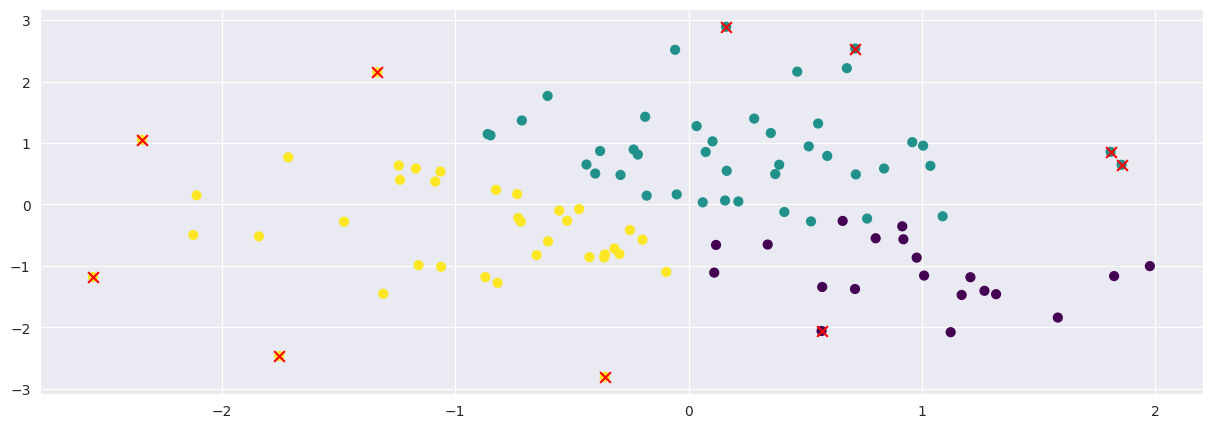

In [30]:
densities = gm.score_samples(X1)
densities_threshold = np.percentile(densities, 10)
anomalies = X1[densities < densities_threshold]

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis')
ax.scatter(anomalies[:, 0], anomalies[:, 1], c="red", s=60, marker="x", cmap='viridis')